In [1]:
import numpy as np
import pandas as pd

In [2]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [9]:
from pymongo import MongoClient

client = MongoClient()

db = client['glvis_db']
val_collection = db['bert_mrpc']

In [10]:
val_collection.count()

/home/snie/anaconda3/envs/glvis/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


5801

In [11]:
reduce_mean = []
cls_token = []

for cur in val_collection.find():
    reduce_mean.append(cur['reduce_mean'])
    cls_token.append(cur['cls_token'])

In [12]:
reduce_mean = np.array(reduce_mean)
cls_token = np.array(cls_token)

In [7]:
df = pd.DataFrame(cls_token[100:120, 100:200])

In [17]:
def plot_along_example(D, method):
    # Compute and plot first dendrogram.
    fig = pylab.figure(figsize=(50,50))
    ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
    Y = sch.linkage(D, method=method)
    Z1 = sch.dendrogram(Y, orientation='left')
    idx1 = Z1['leaves']
    ax1.set_xticks([])
    ax1.set_yticks([])

    # Plot distance matrix.
    axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
    T = D[idx1, :]
    im = axmatrix.matshow(T, aspect='auto', origin='lower', cmap=plt.get_cmap('bwr'))
    axmatrix.set_xticks([])
    axmatrix.set_yticks([])

    # Plot colorbar.
    axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
    pylab.colorbar(im, cax=axcolor)
    fig.show()
    
    return T

In [21]:
def plot_along_dim(D, method):
    # Compute and plot first dendrogram.
    fig = pylab.figure(figsize=(50,50))
    ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
    Y = sch.linkage(D.T, method=method)
    Z1 = sch.dendrogram(Y, orientation='top')
    idx1 = Z1['leaves']
    ax1.set_xticks([])
    ax1.set_yticks([])

    # Plot distance matrix.
    axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
    T = D[:, idx1]
    im = axmatrix.matshow(T, aspect='auto', origin='lower', cmap=plt.get_cmap('bwr'))
    axmatrix.set_xticks([])
    axmatrix.set_yticks([])

    # Plot colorbar.
    axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
    pylab.colorbar(im, cax=axcolor)
    fig.show()

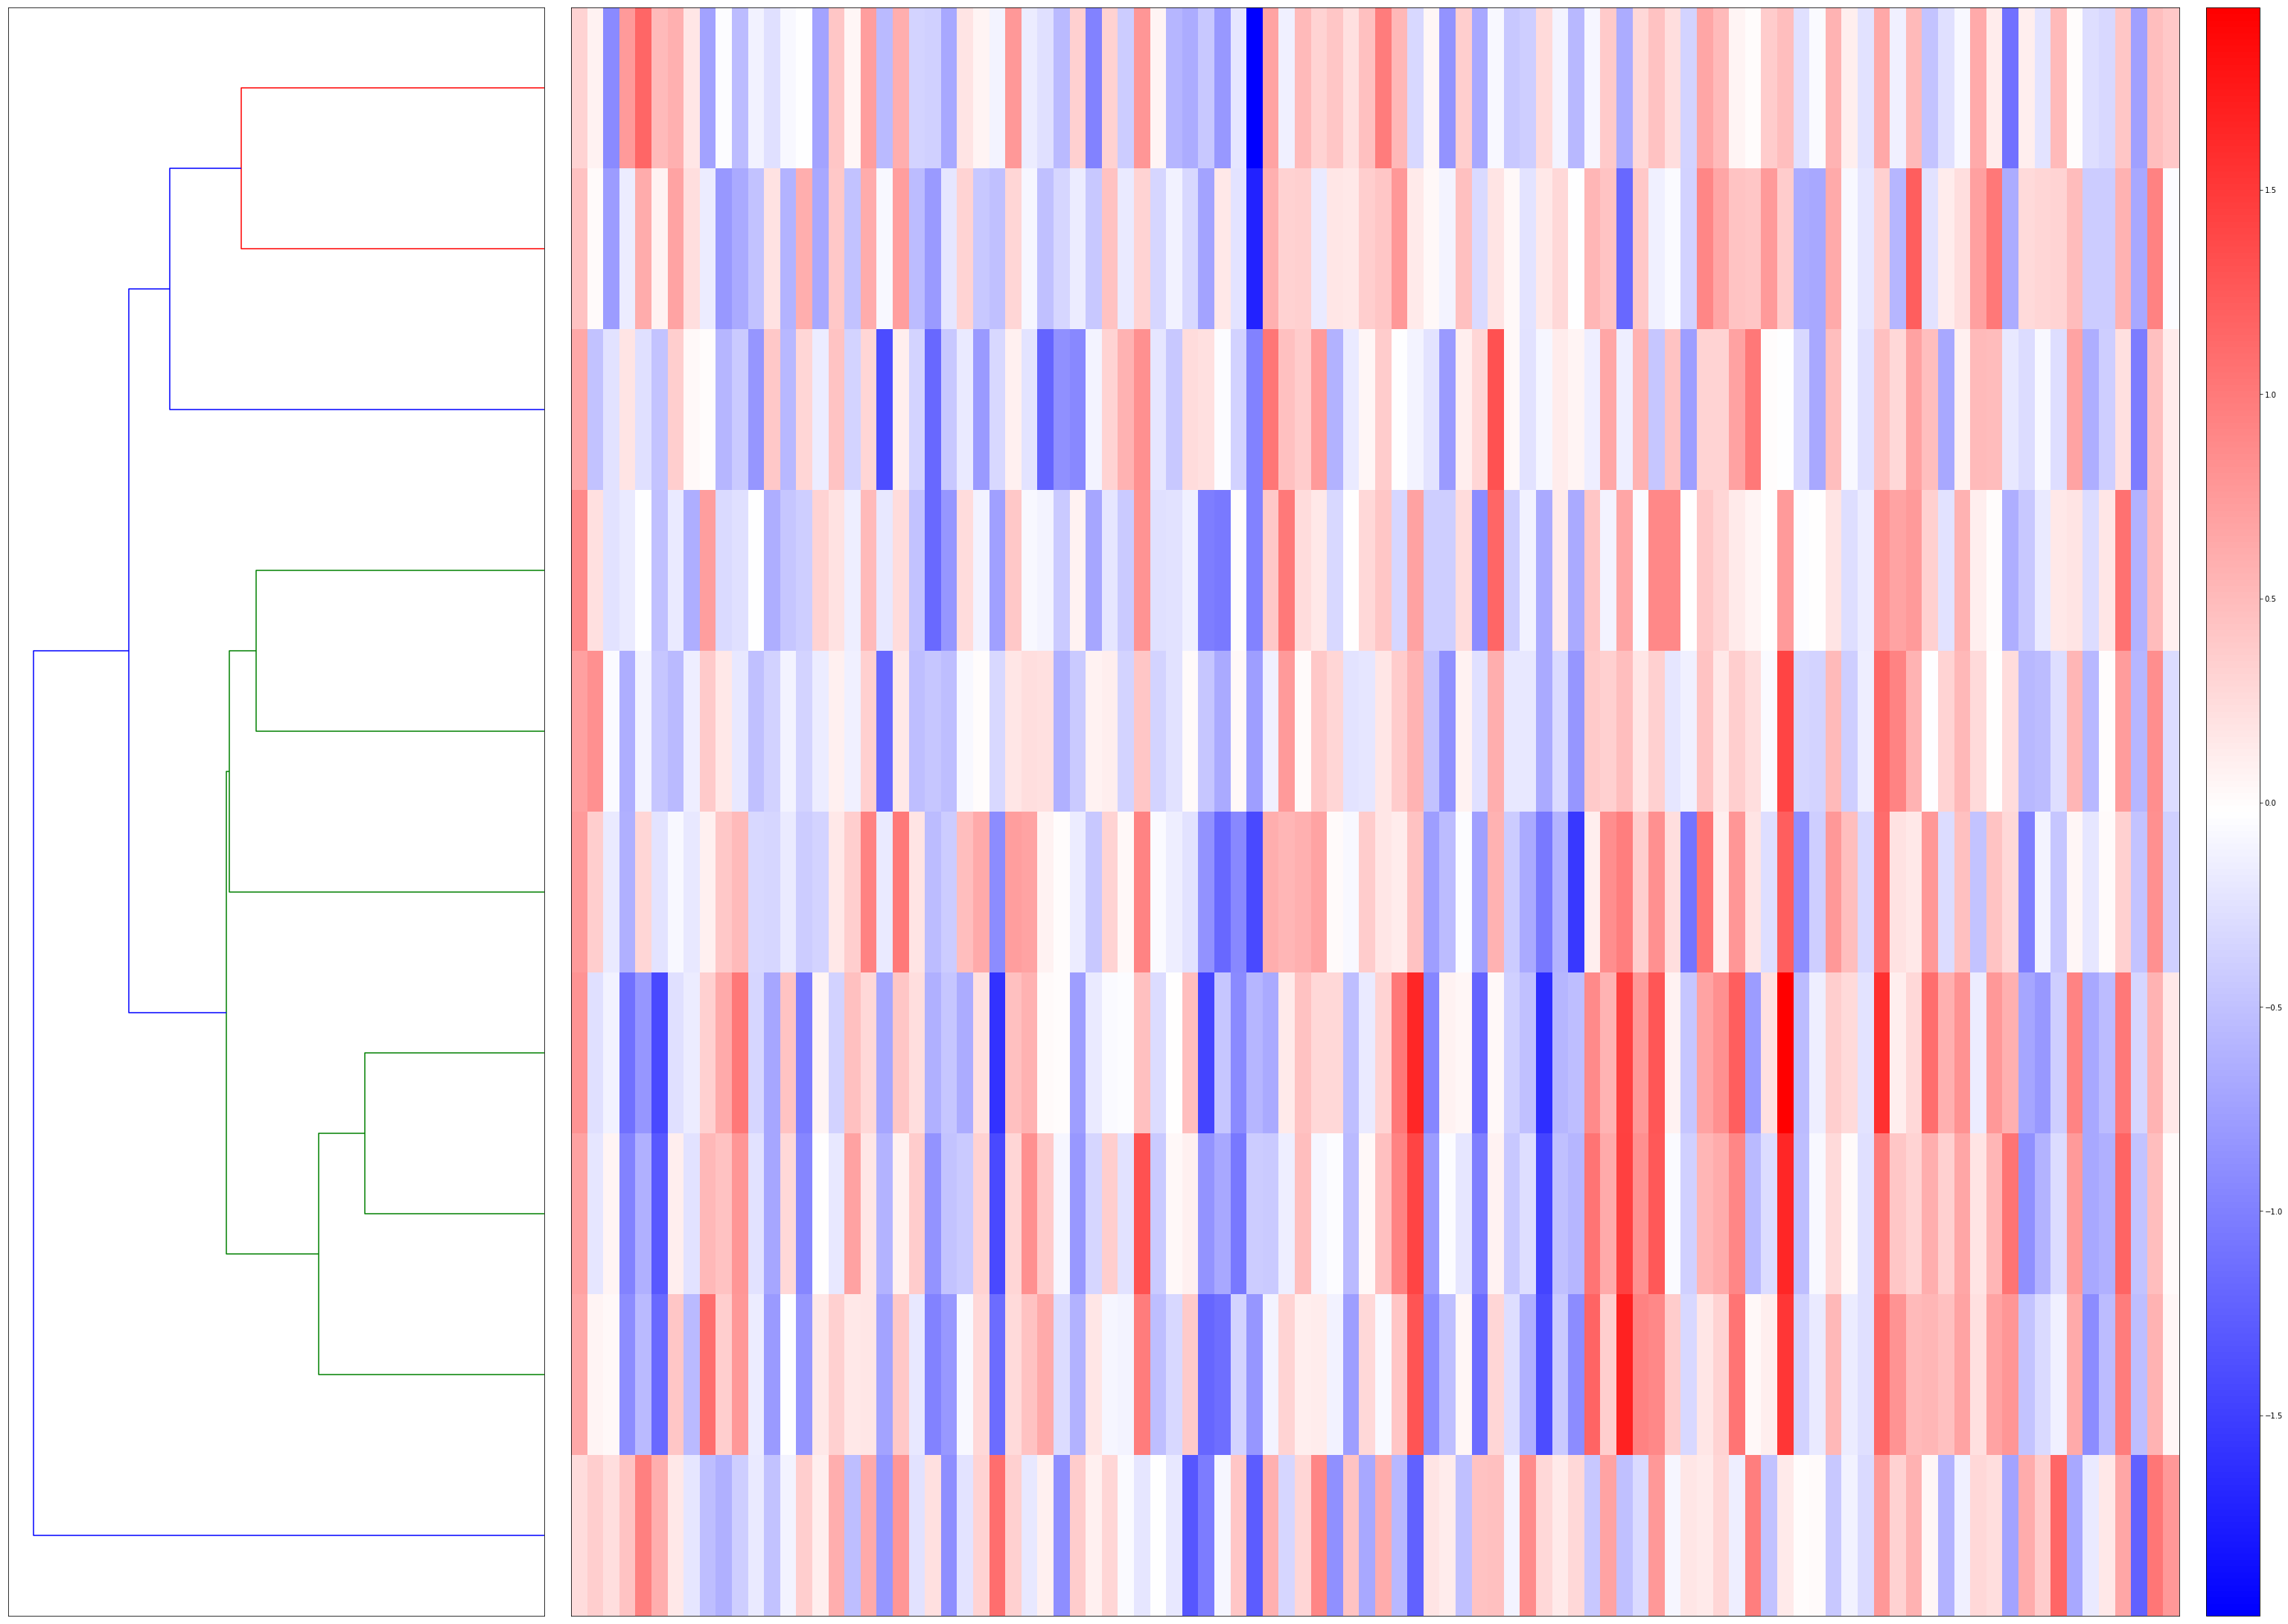

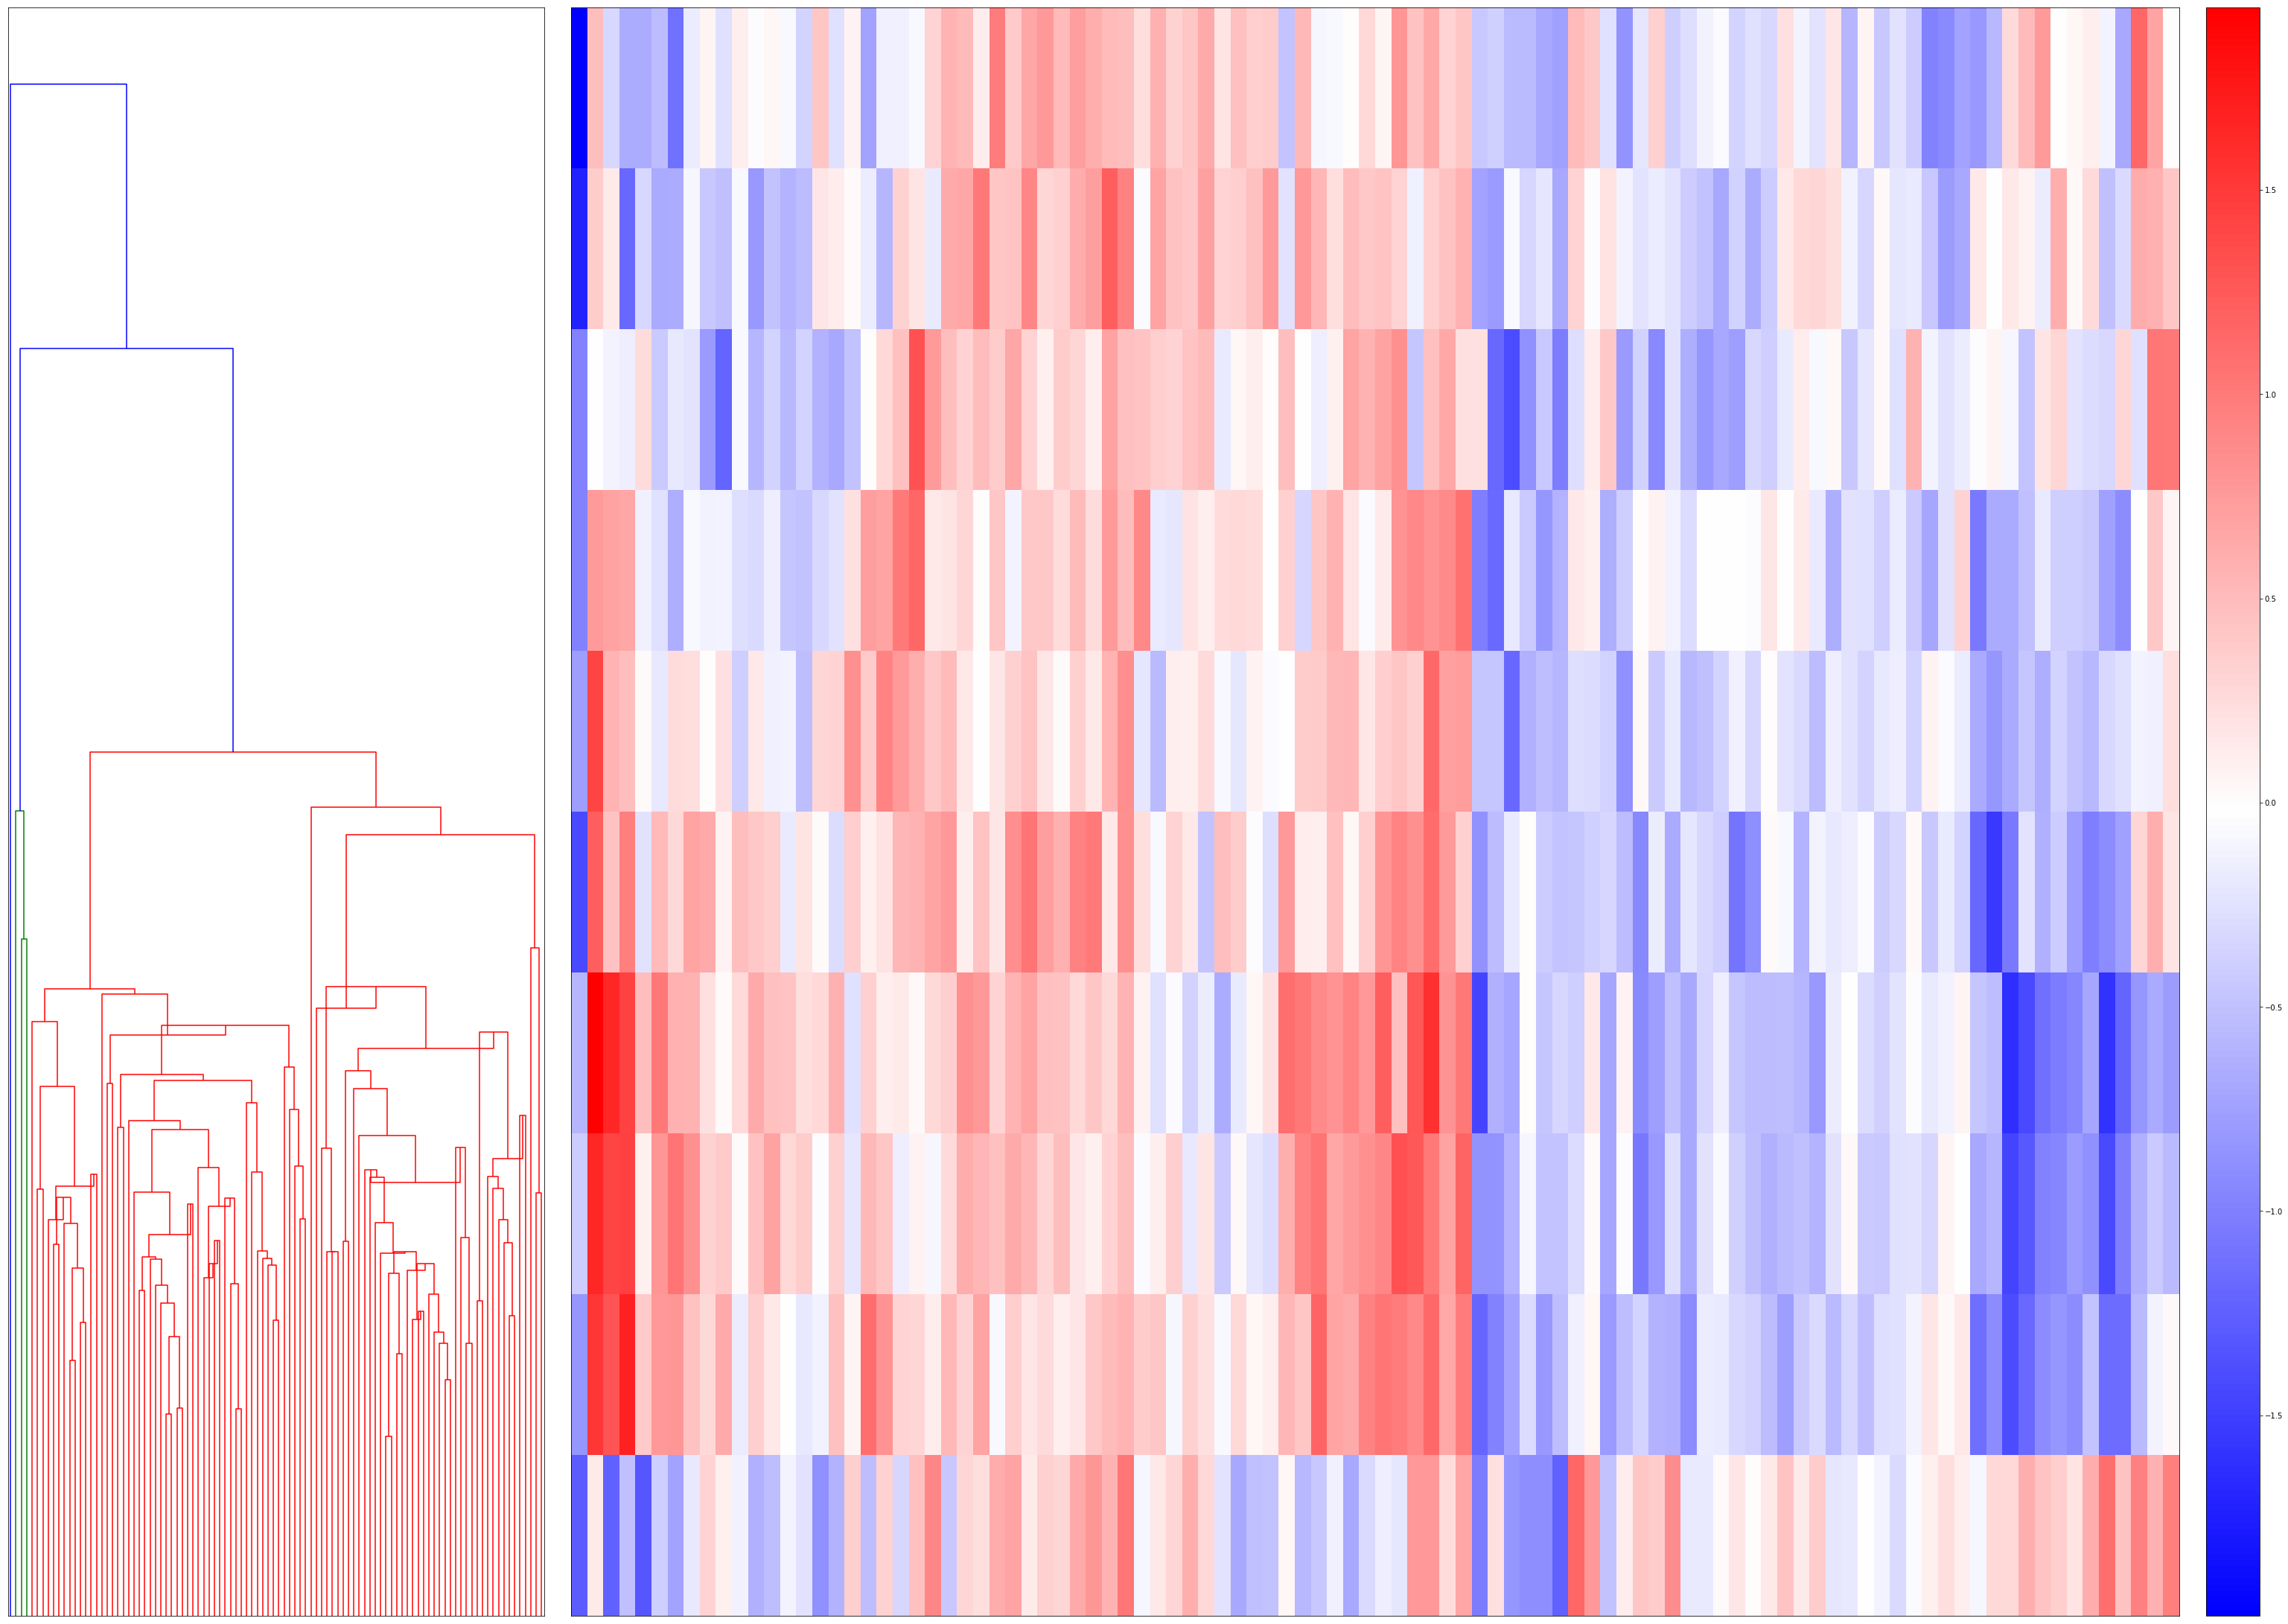

In [29]:
D = cls_token[10:20, 100:200]

DX = plot_along_example(D, method='centroid')
plot_along_dim(DX, method='centroid')

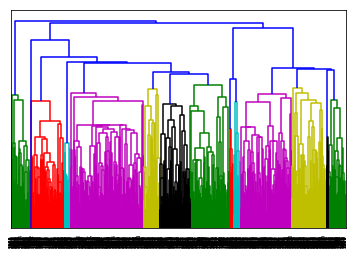

In [27]:
# Generate random features and distance matrix.
size = 2000
x = scipy.rand(size)
D = scipy.zeros([size,size])
for i in range(size):
    for j in range(size):
        D[i,j] = abs(x[i] - x[j])

condensedD = squareform(D)

# Compute and plot first dendrogram.
Y = sch.linkage(condensedD, method='centroid')
Z1 = sch.dendrogram(Y, orientation='left')

# Compute and plot second dendrogram.
Y = sch.linkage(condensedD, method='single')
Z2 = sch.dendrogram(Y)

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
fig.show()
fig.savefig('dendrogram.png')


In [2]:
# import widget classes and instantiate Network instance
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [5]:
# generate random matrix
num_rows = 500
num_cols = 10
np.random.seed(seed=100)
mat = np.random.rand(num_rows, num_cols)

# make row and col labels
rows = range(num_rows)
cols = range(num_cols)
rows = [str(i) for i in rows]
cols = [str(i) for i in cols]

# make dataframe 
df = pd.DataFrame(data=mat, columns=cols, index=rows)

In [20]:
df = pd.DataFrame(vectors[:, :])

In [21]:
net.load_df(df)
net.cluster(enrichrgram=False)
net.widget()

clustergrammer_widget(network='{"row_nodes": [{"name": 0, "ini": 76, "clust": 15, "rank": 8, "rankvar": 17, "g…

In [30]:
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]

In [32]:
Z = sch.linkage(X, 'ward')

In [34]:
len(X)

8

In [36]:
Z

array([[ 5.        ,  6.        ,  0.        ,  2.        ],
       [ 2.        ,  7.        ,  0.        ,  2.        ],
       [ 0.        ,  4.        ,  1.        ,  2.        ],
       [ 1.        ,  8.        ,  1.15470054,  3.        ],
       [ 9.        , 10.        ,  2.12132034,  4.        ],
       [ 3.        , 12.        ,  4.11096096,  5.        ],
       [11.        , 13.        , 14.07183949,  8.        ]])

In [37]:
import sys

In [38]:
sys.path.append('../')

In [23]:
import hierarchical_clustering
from hierarchical_clustering import cluster_row_and_col, calc_distance_matrix

In [24]:
%load_ext autoreload
%autoreload 2

In [60]:
import importlib
importlib.reload(hierarchical_clustering)

<module 'hierarchical_clustering' from '../hierarchical_clustering.py'>

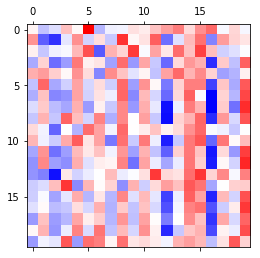

In [25]:
d = cls_token[100:120, 500:520]

plt.matshow(d, cmap=plt.get_cmap('bwr'))

In [26]:
res = cluster_row_and_col(d)

In [18]:
import sys

In [19]:
sys.path.append('..')

In [20]:
from prepare_draw_data import prepare_heatmap_data

In [27]:
hm = prepare_heatmap_data(d, res, num_of_rows=5, num_of_cols=5)

In [29]:
from itertools import groupby, count

In [30]:
count(res['row']['groups']['3'])

KeyError: 'groups'

In [265]:
for k, g in groupby(res['row']['groups']['3']):
    print(k, len(list(g)))

1 278
3 1
2 121


In [270]:
plt.rcParams["figure.figsize"] = (10,10)

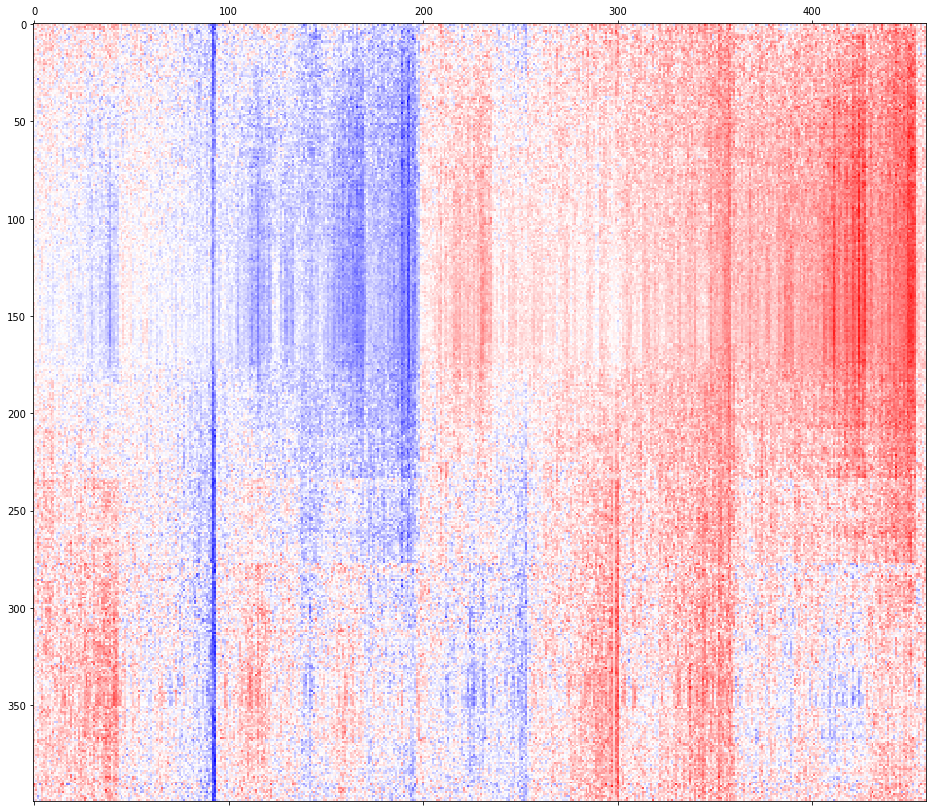

In [252]:
dx = d[res['row']['new_idx'], :]
dx = dx[:, res['col']['new_idx']]
plt.matshow(dx, cmap=plt.get_cmap('bwr'))